In [1]:
import tensorflow as tf

In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
conda install -c conda-forge nomkl

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




In [8]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
fashion=keras.datasets.fashion_mnist

In [10]:
(X_train,y_train),(X_test,y_test) = fashion.load_data()

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
y_train.shape

(60000,)

In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
# optimize the model with much higher accuracy, 
#as they are currently ranging from 0 to 255 corresponding to rgb values
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float')/255

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
class_name = ['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot']
class_name

['T-shirt/top',
 'Trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

In [17]:
y_train[0]

9

In [18]:
class_name[y_train[0]]

'ankle boot'

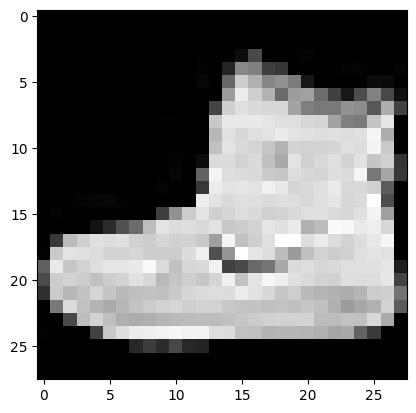

In [19]:
plt.imshow(X_train[0],cmap='gray')

The label for this image isTrouser


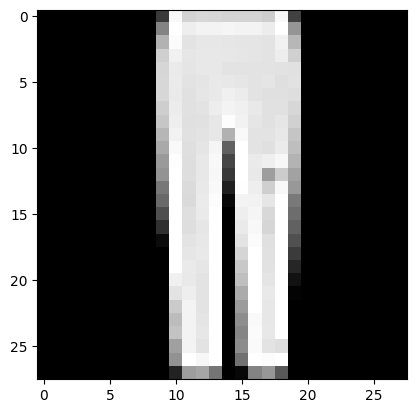

In [20]:
from random import randrange
item=randrange(60000)

plt.imshow(X_train[item],cmap='gray')
print("The label for this image is" + str(class_name[y_train[item]]))

In [21]:
SNN=keras.models.Sequential()
# in the first layer, we need 28*28 = 784 nodes
SNN.add(keras.layers.Flatten(input_shape=[28,28]))
SNN.add(keras.layers.Dense(300,activation="relu")) # Rectified Linear Unit: The prontal after Dense should be number of nodes of inputs
SNN.add(keras.layers.Dense(100,activation="relu"))# Second layer added
SNN.add(keras.layers.Dense(10,activation="softmax"))# Output layer with 10 outputs 

In [22]:
SNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
SNN.layers

In [24]:
hidden1 = SNN.layers[1]

In [25]:
weights,biases = hidden1.get_weights()
biases
weights

array([[ 0.00373518, -0.02418925,  0.05298428, ..., -0.02694914,
         0.03037514,  0.03868282],
       [-0.00096676,  0.02896549, -0.05980814, ..., -0.02706525,
        -0.06660946,  0.01878279],
       [ 0.05025556, -0.04201739,  0.054949  , ...,  0.05058685,
        -0.05579405,  0.06705013],
       ...,
       [-0.00380699,  0.0152991 , -0.01130085, ..., -0.03473428,
        -0.02965615,  0.02366918],
       [-0.01147146, -0.01302349,  0.01481054, ...,  0.03160829,
        -0.01848297,  0.05031938],
       [ 0.04938898,  0.01002852, -0.06991623, ...,  0.0477759 ,
         0.02583648,  0.05327024]], dtype=float32)

In [26]:
SNN.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [27]:
history=SNN.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7000 - accuracy: 0.7691
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4799 - accuracy: 0.8328
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4360 - accuracy: 0.8467
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4071 - accuracy: 0.8568
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3873 - accuracy: 0.8643
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3704 - accuracy: 0.8693
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3560 - accuracy: 0.8737
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3443 - accuracy: 0.8777
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3355 - accuracy: 0.8799
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.325

In [28]:
SNN.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3696 - accuracy: 0.8705


[0.36956095695495605, 0.8705000281333923]

<Axes: >

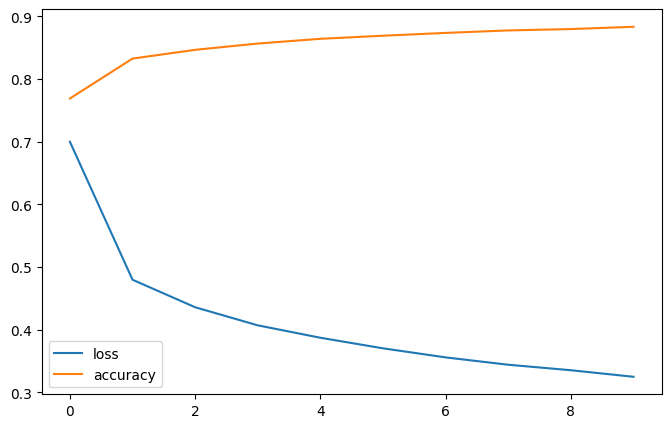

In [29]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [30]:
predict_y=SNN.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [31]:
predict_y.round(2)

array([[0.  , 0.  , 0.  , ..., 0.1 , 0.  , 0.85],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.03, 0.01, 0.  ]], dtype=float32)

In [32]:
predicted_class=np.argmax(predict_y,axis=1)

In [33]:
predicted_class

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [34]:
np.array(class_name)[predicted_class]

array(['ankle boot', 'pullover', 'Trouser', ..., 'bag', 'Trouser',
       'sandal'], dtype='<U11')

the prediction is ankle boot


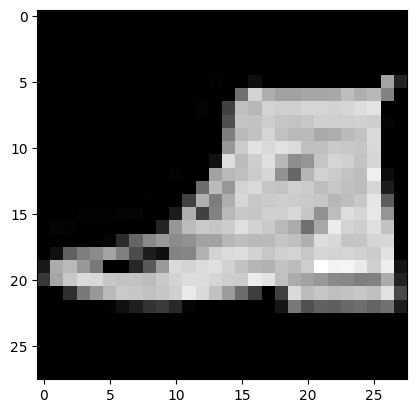

In [35]:
item=randrange(10000)
plt.imshow(X_test[item], cmap='gray')
print("the prediction is "+ str(class_name[predicted_class[item]]))

In [36]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,predicted_class)

([<matplotlib.axis.YTick at 0x2aa66adc700>,
 [Text(0, 0.5, 'T-shirt/top'),
  Text(0, 1.5, 'Trouser'),
  Text(0, 2.5, 'pullover'),
  Text(0, 3.5, 'dress'),
  Text(0, 4.5, 'coat'),
  Text(0, 5.5, 'sandal'),
  Text(0, 6.5, 'shirt'),
  Text(0, 7.5, 'sneaker'),
  Text(0, 8.5, 'bag'),
  Text(0, 9.5, 'ankle boot')])

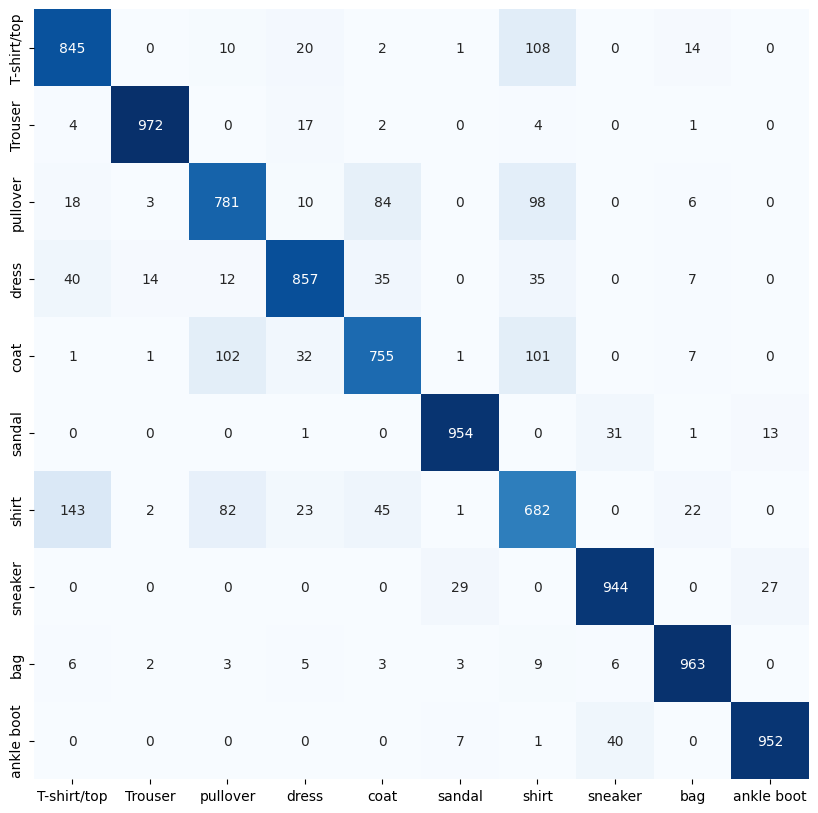

In [37]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks(np.arange(10)+0.5,['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot'])
plt.yticks(np.arange(10)+0.5,['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot'])